In [286]:
import pandas as pd
import keras as K
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from random import randint

In [287]:
data_set = pd.read_csv('ready_dataset.csv')

In [288]:
X = data_set['img'].values
X = [pickle.loads(eval(x)) for x in X]
X = np.array(X)
X = X / 255

y = data_set['true'].values

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [290]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    K.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(2)
])

c:\Users\egork\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [291]:
model.compile(
    loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=K.optimizers.Adam(0.0001),
    metrics=[K.metrics.SparseCategoricalAccuracy()]
)

In [292]:
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0000001)

In [293]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - loss: 0.6943 - sparse_categorical_accuracy: 0.4996 - val_loss: 0.6994 - val_sparse_categorical_accuracy: 0.4742 - learning_rate: 1.0000e-04
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - loss: 0.6921 - sparse_categorical_accuracy: 0.5199 - val_loss: 0.6906 - val_sparse_categorical_accuracy: 0.5324 - learning_rate: 1.0000e-04
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 242ms/step - loss: 0.6874 - sparse_categorical_accuracy: 0.5644 - val_loss: 0.6737 - val_sparse_categorical_accuracy: 0.6023 - learning_rate: 1.0000e-04
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - loss: 0.6816 - sparse_categorical_accuracy: 0.5599 - val_loss: 0.6636 - val_sparse_categorical_accuracy: 0.5940 - learning_rate: 1.0000e-04
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 236ms/step - loss: 0.6709 - sparse_categorical_accuracy: 0.5823 - val_loss: 0.6903 - val_sparse_categorical_accuracy: 0.5441 - learning_rate: 1.0000e-04
Epoch 6/100
76/76 ━━

In [294]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

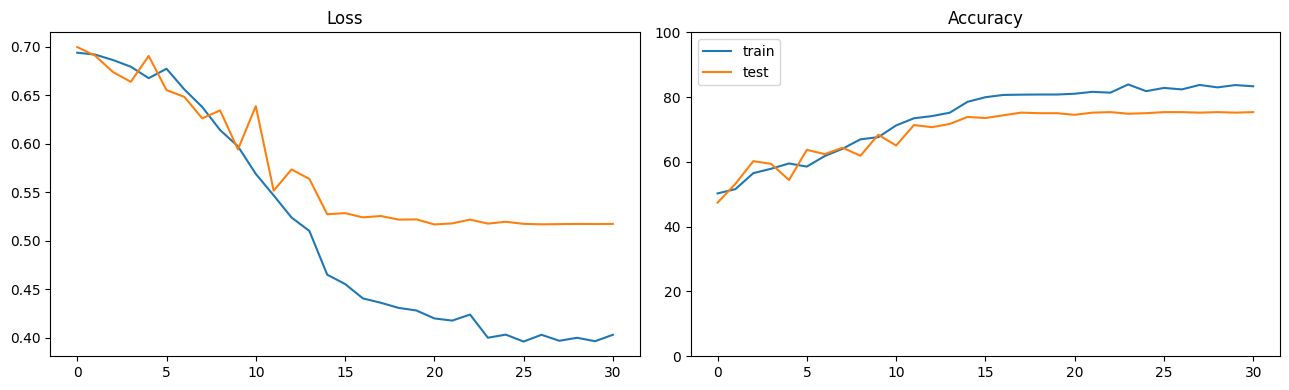

In [295]:
plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


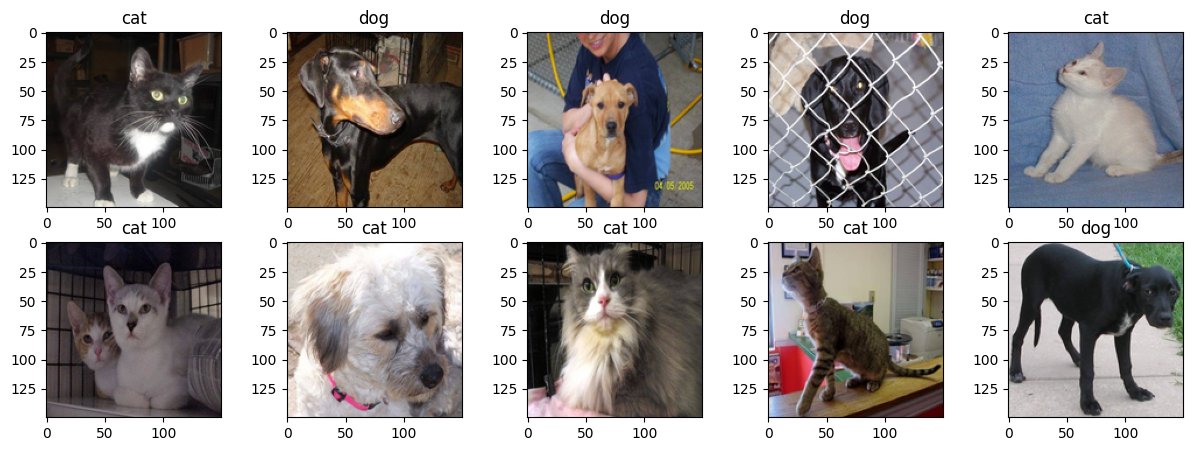

In [297]:
map_dict = {0: 'cat', 1: 'dog'}

plt.figure(figsize=(15, 5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    x = randint(0, len(X_test) - 1)
    plt.imshow(X_test[x])
    plt.title(map_dict[np.argmax(model.predict(np.array([X_test[x]])))])

plt.show()